# Gaussian Distribution

Also known as the normal distribution.

Denoted by the following:

$$ X \sim \mathcal{N}(\mu,\sigma^2) $$

Which means that the value of the random variable $ X $ is taken from the points on the curve parameterized by $ \mu $ and $ \sigma $

The actual formula is 


$$ \mathcal{N}(x\vert\mu,\sigma^2) = \frac{1}{(2\pi\sigma^2)^\frac{1}{2}}exp\{-\frac{1}{2\sigma^2}(x - \mu)^2\} $$


Let's look at all the nice properties.

Properties which define it as a probability distribution:
1. $ \mathcal{N}(x\vert\mu,\sigma^2) \gt 0 $ 
1. $ \int_{-\infty}^{\infty}\mathcal{N}(x\vert\mu,\sigma^2) = 1 $

Parameter properties:
1. $ E[X] = \mu $
1. $ E[X^2] = \mu^2 + \sigma^2 $
1. $ E[X^2] - E[X]^2 = \sigma^2 $

All the above proofs are trivial and left as an exercise to the reader :)

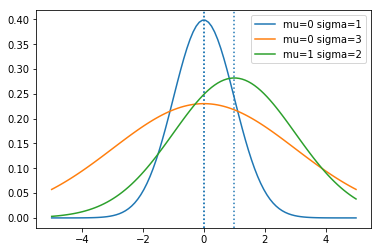

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/np.sqrt((np.pi * sig * 2))

for mu, sig in [(0, 1), (0, 3), (1, 2)]:
    x = np.linspace(-5, 5, 100)
    plt.axvline(mu, linestyle=':')
    handle = plt.plot(x, gaussian(x, mu, sig), label='mu=%d sigma=%d' % (mu, sig))
    plt.legend()
plt.show()

## Fitting to an unknown Gaussian Distribution (Through Maximum Likelihood Estimation)

Let us say we have an unknown gaussian distribution $ \mathcal{N}(\mu,\sigma^2) $

What we know are a collection of $ N $ points drawn i.i.d from the above distribution 

$$ x_1, x_2, \dots, x_N$$

Our goal is to determine some $ \mu' $ and $ \sigma' $ which best fit this distribution of points. We do this based on the criterion of maximum-likelihood.

We compute the probability that the dataset is generated by some other $ \mu' $ and $ \sigma' $

$$ p(\textbf{x}\vert \mu', \sigma'^2) = \prod_{n=1}^{N}\mathcal{N}(x_n\vert\mu',\sigma'^2) $$

So, to best model the unknown distribution, we try to find the $ \mu' $ and $ \sigma' $ that maximizes the probability $ p $

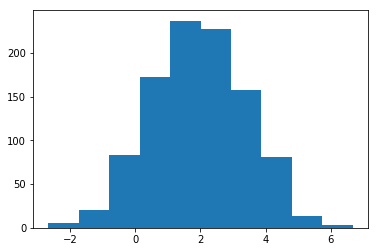

In [2]:
mu = 2.0
sig = 1.4

numbers = np.random.normal(mu, sig,size=1000)
plt.hist(numbers, histtype='stepfilled')
plt.show()

Let us try to find some closed form estimators based on the knowns.

Typically we can find the maxima by computing the derivative on the probability with respect to $ \mu $ and $ \sigma $. Problem is, our variables are in the exponent. We need to simplify our derivative calculations. 

There's a useful trick - if we have a curve $ y $  and a function $ f $ that is monotonic, then the maxima of $ f(y) $ is the same as the maxima of $ y $. One such function is $ log x $.

Application of log converts the product to a sum.

$$ log (p(\textbf{x}\vert \mu', \sigma'^2)) = log(\prod_{n=1}^{N}\mathcal{N}(x_n\vert\mu',\sigma'^2)) $$
$$ log (p(\textbf{x}\vert \mu', \sigma'^2)) = \sum_{n=1}^{N}log(\mathcal{N}(x_n\vert\mu',\sigma'^2))) $$
$$ log (p(\textbf{x}\vert \mu', \sigma'^2)) = \sum_{n=1}^{N}log(\frac{1}{(2\pi\sigma^2)^\frac{1}{2}}exp\{-\frac{1}{2\sigma^2}(x_n - \mu)^2\}) $$
$$ log (p(\textbf{x}\vert \mu', \sigma'^2)) = \sum_{n=1}^{N}(-\frac{1}{2}log(2\pi) - log (\sigma) - \frac{1}{2\sigma^2}(x_n - \mu)^2)$$

$$ log (p(\textbf{x}\vert \mu', \sigma'^2)) = \sum_{n=1}^{N}\frac{1}{2\sigma^2}(x_n - \mu)^2) -\frac{N}{2}log(2\pi) -Nlog(\sigma) $$

Maximizing for $ \mu $

$$ \mu_{ML} = \frac{1}{N}\sum_{n=1}^{N}x_n $$

Maximizing for $ \sigma $ and substituting $ \mu_{ML} $

$$ \sigma^2_{ML} = \frac{1}{N}\sum_{n=1}^{N}(x_n - \mu_{ML})^2 $$

mu=2.000000, sigma^2=16.000000


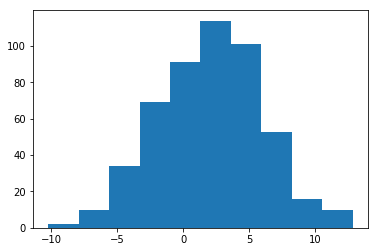

In [3]:
mu = 2.0
sigma = 4
N = 500
print("mu=%f, sigma^2=%f" % (mu, sigma**2))
values = np.random.normal(mu, sigma,size=N)
plt.hist(values, histtype='stepfilled')
plt.show()

In [4]:
mu_ML = np.mean(values)
sigma_ML = np.sqrt(np.mean(np.power(values - mu_ML, 2)))

print("mu_ML=%f, sigma_ML^2=%f" % (mu_ML, sigma_ML**2))

mu_ML=2.032662, sigma_ML^2=16.193121


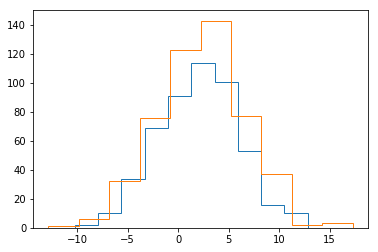

In [5]:
ml_values = np.random.normal(mu_ML, sigma_ML, size=N)

plt.hist(values, histtype='step')
plt.hist(ml_values, histtype='step')
plt.show()

As we can see, we are significantly off when it comes to $ \sigma^2 $. This is because the variance estimator is off by a factor of $ \frac{N - 1}{N} $.

We can fix this by changing our estimator to

$$ \widetilde{\sigma}^2 = \frac{1}{N - 1}\sum_{n=1}^{N}(x_n - \mu_{ML})^2$$

In [6]:
mu_ML = np.mean(values)
sigma_ML_true = np.sqrt(np.sum(np.power(values - mu_ML, 2))/(N - 1))

print("mu_ML=%f, sigma_ML^2=%f" % (mu_ML, sigma_ML_true**2))

mu_ML=2.032662, sigma_ML^2=16.225572


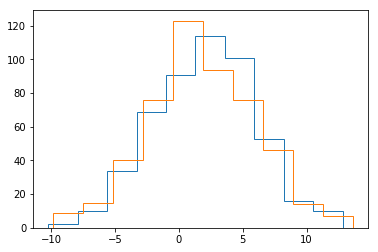

In [7]:
ml_values = np.random.normal(mu_ML, sigma_ML_true, size=N)

plt.hist(values, histtype='step')
plt.hist(ml_values, histtype='step')
plt.show()

Even though the value is off, it is still closer to the true distribution $ \mu $ and $ \sigma $.

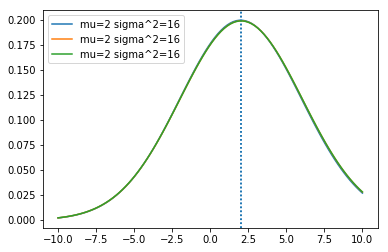

In [8]:
for u, sig in [(mu, sigma), (mu_ML, sigma_ML), (mu_ML, sigma_ML_true)]:
    x = np.linspace(-10, 10, 100)
    plt.axvline(u, linestyle=':')
    handle = plt.plot(x, gaussian(x, u, sig), label='mu=%d sigma^2=%d' % (u, sig**2))
    plt.legend()
plt.show()

## Fitting to an unknown Gaussian Distribution (Through Bayesian Inference Approach)

The big problem with the Maximum Likelihood Estimation approach is that it's highly sensitive to the values taken from the distribution.

As with any problem in statistics and probability, we cannot be accurate unless we perform a large number of trials/experiments. This is interrelated with the [The Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers).

Let's say we toss a fair coin 10 times. According to probability theory, we _expect_ to see 5 heads and 5 tails. However, it's perfectly possible for the coin to show 10 heads or 10 tails in our trials. The odds of 10 heads is **_unlikely_**, not **_impossible_**. In fact, it is certainly possible that you toss a fair coin a million or a billion times and you could get a million or a billion heads. 

This is especially important when we are modelling real life events such as correlating incidences of cancer with a potential external cause (such as chemicals/pathogens/environment) versus being a result of random mutations or pre-existing genetic conditions. It could be the case that when examining small populations, we could see higher incidences of cancer (as a %age) in some areas versus others. It is important that we do not treat unlikely events as if they could never happen.

Let's assume that when we perform the experiment, we get 10 heads. If we write an estimator which makes predictions based purely on the data, it would say that if we toss the coin once more, we are **_sure to get heads_** i.e. $ P(X=Tails) = 0 $. This is based on the fact that coin always landed on heads in the past. 

It's fine that our estimator is trying to optimize for the best results i.e. where it is trying to match the expected data. Where our estimator fails is in its **_model of reality_**. Considering that we **_know_** the coin is fair, our estimator acts like the coin **_cannot possibly be_** fair.

This is where **_Bayesian Inference_** comes into the picture. The principle of Bayesian inference states that we build a **_basic model of reality_** based on some assumptions. For example, when we try to predict the result of a coin toss, we could start off with the assumption that the coin is fair. However, as we get more and more data, we try to tailor our results to the observations so that we get a better perception of reality than what the data alone tells us. If we get 10 heads in a row, our model could have a bias towards predicting heads, but still allows for the possibility of a tails appearing. 

This is a much better assumption than the MLE approach since it can give more robust results and also automatically adjust itself in accordance to the evidence seen.

To start with, we consider a probability distribution whose parameters we do not know fully. For example, we can assume a Gaussian whose variance is known but mean is unknown

$$ X \sim \mathcal{N}(\mu, \sigma^2) $$

The likelihood of a given dataset $ \textbf{X} = \{x_1, \dots, x_n\} $ is given by

$$ P(\textbf{X}|\mu, \sigma) = \prod_{n=1}^{N} p(x_n | \mu, \sigma^2) $$

$$ P(\textbf{X}| \mu, \sigma) = \frac{1}{(2 \pi \sigma^2)^\frac{N}{2}} exp\{-\frac{1}{2\sigma^2} \sum_{n=1}^{N} (x_n - \mu)^2 \} $$

We have a prior distribution of the parameter $ \mu $ given by $ p(\mu) $. If the prior distribution is gaussian, we can multiply with our likelihood to produce a posterior distribution of $ \mu $ based on the data which is also gaussian.

$$ p(\mu | \textbf{X}) \propto p(\textbf{X} | \mu) p (\mu) $$

On substituting the expressions and completing the square, we get a new gaussian distribution

$$ p (\mu | \textbf{X}) = \mathcal{N}(\mu; \mu_N, \sigma_N) $$

$$ \mu_N = \frac{\sigma^2}{N \sigma_0^2 + \sigma^2} \mu_0 + \frac{N \sigma_0^2}{N \sigma_0^2 + \sigma^2}\mu_{ML} $$

$$ \frac{1}{\sigma_N^2} = \frac{1}{\sigma_0^2} + \frac{N}{\sigma^2}$$

mu=0.800000, sigma^2=0.010000


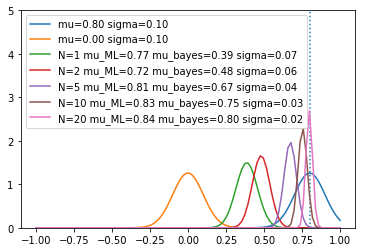

In [52]:
from math import sqrt

mu = 0.8
sigma = 0.1
print("mu=%f, sigma^2=%f" % (mu, sigma**2))


x = np.linspace(-1, 1, 100)

plt.axvline(mu, linestyle=':')
plt.ylim(top=5)

mu_prior = 0
sigma_prior = 0.1

handle = plt.plot(x, gaussian(x, mu, sigma), label='mu=%.2f sigma=%.2f' % (mu, sigma))
handle = plt.plot(x, gaussian(x, mu_prior, sigma_prior), label='mu=%.2f sigma=%.2f' % (mu_prior, sigma_prior))

for N in [1, 2, 5, 10, 20]:
    values = np.random.normal(mu, sigma,size=N)
    mu_ML = np.mean(values)
    
    variance_factor = N*sigma_prior**2 + sigma**2
    
    wt_prior = sigma**2 / variance_factor
    wt_ML = N*sigma_prior**2 / variance_factor
    
    mu_bayes = wt_prior * mu_prior + wt_ML * mu_ML
    sigma_bayes = sqrt(sigma**2 * sigma_prior**2 / variance_factor)
    handle = plt.plot(x, gaussian(x, mu_bayes, sigma_bayes), label='N=%d mu_ML=%.2f mu_bayes=%.2f sigma=%.2f' % (N, mu_ML, mu_bayes, sigma_bayes))
    
plt.legend()
plt.show()